In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.naive_bayes import MultinomialNB

from data_prep import y_train, y_test, tf_idf_data_train, tf_idf_data_test
from visualizations import confusion_matrix_heat_map

/Users/stevedye/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/stevedye/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [2]:
parameters = {'alpha': [1]}

In [3]:
nb = MultinomialNB()
nb_classifier = GridSearchCV(nb, parameters, cv=3, n_jobs= -1)
nb_classifier.fit(tf_idf_data_train, y_train)
print(nb_classifier.best_estimator_)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)


In [4]:
nb_train_preds = nb_classifier.predict(tf_idf_data_train)
nb_test_preds = nb_classifier.predict(tf_idf_data_test)

nb_train_score = accuracy_score(y_train, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)

nb_cv_score = cross_val_score(nb_classifier, tf_idf_data_train, y_train, cv=3, scoring="accuracy")

In [5]:
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("CV Scores:", nb_cv_score)

Training Accuracy: 0.8535 		 Testing Accuracy: 0.582
CV Scores: [0.67637395 0.67458184 0.76478495]


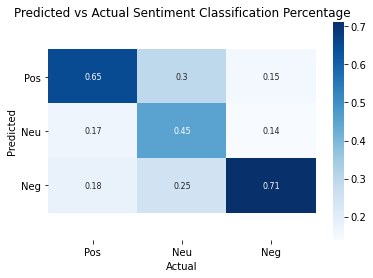

In [6]:
confusion_matrix_heat_map(nb_classifier, tf_idf_data_test, y_test)